# An Analysis of the Effects of Wealth Disparity on Youth Arrest Rates in England and Wales 

In [1]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Introduction

This is a short analysis on the effects of wealth disparity on arrest rates in England and Wales. I determine if there is a correlation between wealth disparity and arrest rates from multiple different angles. But first, I analyse arrest rates in relation to region and ethnicity.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from scipy.stats import linregress

ch1_1_5 = pd.read_excel('Ch 1 - Gateway to the Youth Justice System.xls', sheet_name = 5)
yearly_arrests = ch1_1_5.loc[ch1_1_5.index[11:22]]
yearly_arrests.columns = ['Ethnicity', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',\
                          '2021', np.nan, 'Year ending March 2011 to March 2021 (% change)',\
                          'Year ending March 2016 to March 2021 (% change)', 'Year ending March 2020 to March 2021 (% change)']
yearly_arrests.drop(index=[11,12,17,18,20], inplace=True)
yearly_arrests.drop(columns=np.nan, inplace=True)
yearly_arrests.reset_index(drop=True, inplace=True)
for i in range(2011, 2022):
    yearly_arrests[str(i)] = yearly_arrests[str(i)].astype('int')

## Arrests Rates over the Last Decade

Figure 1 is a table showing the trend of arrest rates over the last decade, alongside percentage changes over different periods of time.

In [4]:
for i in [12, 13, 14]:
    yearly_arrests.iloc[:,i] = round(yearly_arrests.iloc[:,i].astype('float')*100, 0).astype('int')

yearly_arrests.style.set_caption("Figure 1")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; text-align: center; font-size: 17px; font-weight: bold; color: black; padding-top: 20px;\
     font-family: Arial'
 }], overwrite=False)

,Ethnicity,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Year ending March 2011 to March 2021 (% change),Year ending March 2016 to March 2021 (% change),Year ending March 2020 to March 2021 (% change)
0,White,156449,122190,92924,79898,68174,56807,46486,40902,36874,36553,30091,-81,-47,-18
1,Black,21422,17846,13159,11645,10548,10586,10004,9615,8421,8953,6663,-69,-37,-26
2,Asian or Other,11015,9144,7233,6270,5433,5460,4811,4778,4330,4283,3636,-67,-33,-15
3,Mixed,10350,8944,6719,5957,5461,5182,4341,4406,3932,4257,3292,-68,-36,-23
4,Unknown,2482,2089,1857,2255,2098,4002,4133,3782,6210,7055,5829,135,46,-17
5,Total,201718,160213,121892,106025,91714,82037,69775,63483,59767,61101,49511,-75,-40,-19


Figure 2 shows a line graph of the proportion of arrests of young people (ages 10-17) identifying as one of several ethnic categories by year. The proportion of arrests of young people falling under 'White' seems to decrease steadily over the decade, whereas the proportion of arrests of young people that fall under other ethnic groups seems to increase, albeit very slightly. The increase is more pronounced for 'Unknown'.

It is important to note that the ethnicity of an individual is self-defined. Knowing this, a good line of enquiry would be to determine what factors led to the increase in the proportion of arrests for 'Uknown'. Another line of enquiry would be to determine why the decrease in the proportion of arrests for those that fall under 'White' was steep relative to the other ethnic groups.

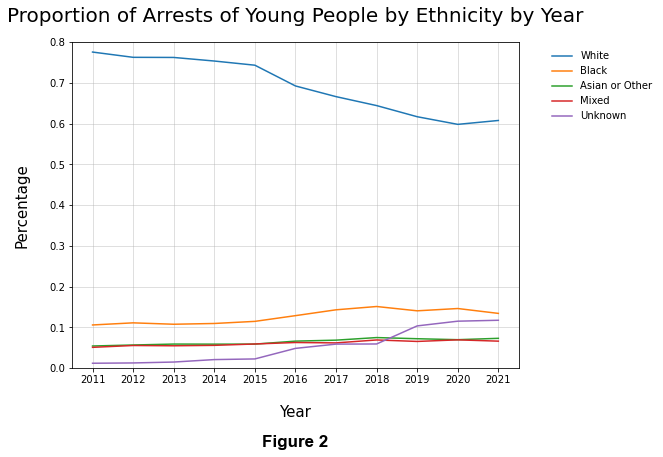

In [5]:
_=plt.figure(figsize=(8, 6))

for i in range(5):
    _=plt.plot(yearly_arrests.columns[1:12], yearly_arrests.iloc[i, 1:12]/yearly_arrests.iloc[5, 1:12],\
               label=yearly_arrests.iloc[i, 0], zorder=3)

_=plt.xlabel('Year', fontsize=15, labelpad= 20)
_=plt.ylabel('Percentage', fontsize=15, labelpad=20, rotation=90)
_=plt.title('Proportion of Arrests of Young People by Ethnicity by Year', pad=20, fontsize= 20)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1), framealpha=0)
_=plt.ylim(0, 0.8)
_=plt.grid(axis='both', which='major', alpha= 0.5, zorder=0)
_=plt.text(5, -0.2, 'Figure 2', ha= 'center', va= 'bottom', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

Figure 3 shows the number of arrests committed by individuals of each ethnic group by year as a ratio of the number of arrests committed by individuals of each ethnic group in the year 2011. 

The ethnic group 'Black', 'Asian or Other' and 'Mixed', henceforth 'ethnic minorities' if collectively mentioned, all decrease substantially, all following a remarkably similar trend. By 2021, the number of arrests of young people of ethnic minority is down more than 60% in comparison to 2011. The number of arrests of white young people has an even sharper decrease, with a decrease of more than 75%. One the other hand, the number of arrests of individuals whose ethnicity is uknown increases sharply over the years. In 2020, for example, the number of arrests almost triples when compared to 2011. A good line of enquiry would be determine why this is.

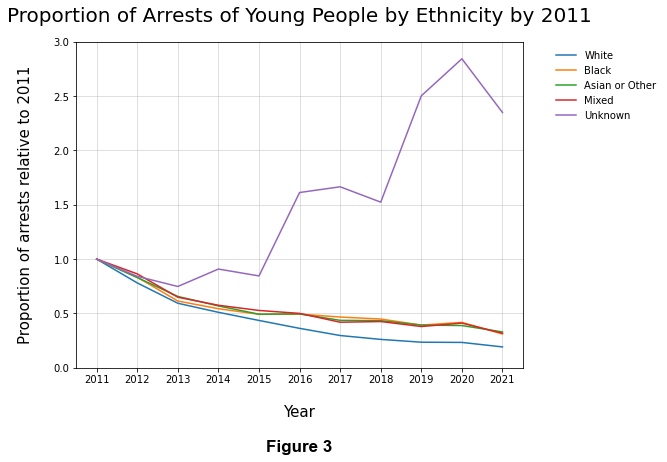

In [6]:
_=plt.figure(figsize=(8, 6))

for i in range(5):
    _=plt.plot(yearly_arrests.columns[1:12], yearly_arrests.iloc[i, 1:12]/yearly_arrests.iloc[i, 1],\
               label=yearly_arrests.iloc[i, 0], zorder=3)

_=plt.xlabel('Year', fontsize=15, labelpad= 20)
_=plt.ylabel('Proportion of arrests relative to 2011', fontsize=15, labelpad=20, rotation=90)
_=plt.title('Proportion of Arrests of Young People by Ethnicity by 2011', pad=20, fontsize= 20)
_=plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1), framealpha=0)
_=plt.ylim(0, 3)
_=plt.grid(axis='both', which='major', alpha= 0.5, zorder=0)
_=plt.text(5, -0.8, 'Figure 3', ha= 'center', va= 'bottom', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

From Figure 2 and Figure 3, we already see differences between young white people and young people of ethnic minority regarding arrest rates. Further investigation is required to determine why more young people that are arrested are categorised as 'Uknown' over the years.

## Arrests by Region

Figure 4 shows us the total number of arrests and the total number of arrests of young people by region. 

In [7]:
ch1_1_8 = pd.read_excel('Ch 1 - Gateway to the Youth Justice System.xls', sheet_name = 8)
regional_arrests = ch1_1_8.loc[ch1_1_8.index[2:19]]
regional_arrests.drop(columns=regional_arrests.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16]], inplace= True)
regional_arrests.drop(index=[2, 12, 14, 16, 18], inplace= True)
regional_arrests.columns = ['Region', 'Total number of arrests', 'Total number of arrests of young people']
regional_arrests.reset_index(drop= True, inplace= True)
regional_arrests['Total number of arrests'] = regional_arrests['Total number of arrests'].astype('int')
regional_arrests['Total number of arrests of young people'] = regional_arrests['Total number of arrests of young people'].astype('int')

regional_pop = ch1_1_8.loc[ch1_1_8.index[39:55]]
regional_pop.drop(columns=regional_pop.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16]], inplace=True)
regional_pop.drop(index=[48, 50, 52, 54], inplace=True)
regional_pop.reset_index(drop=True, inplace=True)
regional_pop.columns = ['Region', '10+ population', '10-17 population']
regional_pop['10+ population'] = regional_pop['10+ population'].astype('int')
regional_pop['10-17 population'] = regional_pop['10-17 population'].astype('int')

ch1_1_12 = pd.read_excel('Ch 1 - Gateway to the Youth Justice System.xls', sheet_name = 12)
regional_arrests_by_eth = ch1_1_12.loc[ch1_1_12.index[2:70]]
regional_arrests_by_eth.columns = ['Police force area', 'White', 'Black', 'Asian or Other', 'Mixed', 'Ethnic minorities',\
                                   'Unknown', 'Total']
regional_arrests_by_eth['Police force area'] = regional_arrests_by_eth['Police force area'].astype('str')
regional_arrests_by_eth.drop(index=[6, 13, 19, 26, 32, 40, 44, 51, 58, 60, 66, 68, 69], inplace= True)
for i in range(1, 8):
    regional_arrests_by_eth.iloc[:, i] = regional_arrests_by_eth.iloc[:, i].astype('int')
regional_arrests_by_eth['Police force area'] = regional_arrests_by_eth['Police force area'].str.replace('Region', '')
regional_arrests_by_eth.reset_index(drop= True, inplace= True)
regional_arrests_by_eth.iloc[24,0]='West Midlands (subregion)'
regional_arrests_by_eth.iloc[53,0]='Wales'

regional_pop['Region'] = regional_pop['Region'].str.strip()
regional_arrests['Region'] = regional_arrests['Region'].str.strip()
regional_arrests_by_eth['Police force area'] = regional_arrests_by_eth['Police force area'].str.strip()
arrests = regional_arrests_by_eth.merge(regional_arrests, left_on='Police force area', right_on='Region').\
          merge(regional_pop, left_on='Police force area', right_on='Region')
arrests.drop(columns=['Region_x', 'Region_y', 'Total number of arrests of young people'], inplace= True)
arrests.rename(mapper={'Police force area': 'Region', 'Total number of arrests': 'Total in region'}, axis=1, inplace= True)
arrests = arrests.reindex(columns=np.append(arrests.columns.values[:-2], ['10-17 population', '10+ population']))
arrests.drop(index=10, inplace= True)

regional_arrests.style.set_caption("Figure 4")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; text-align: center; font-size: 17px; font-weight: bold; color: black; padding-top: 20px;\
     font-family: Arial'
 }], overwrite=False)

,Region,Total number of arrests,Total number of arrests of young people
0,North East,40029,2606
1,North West,69090,5693
2,Yorkshire and the Humber,86333,6405
3,East Midlands,43863,3173
4,West Midlands,49497,3445
5,East of England,52943,4837
6,London,114602,10756
7,South East,100987,8141
8,South West,42701,3116
9,England,600045,48172


Figure 5 shows us the ratio of the number of arrests of young people to the total number of arrests by region. London has the highest proportion of young people arrests, just north of 9%. In comparison, Wales has a percentage just under 6%. Most regions have a percentage hovering around 7%.

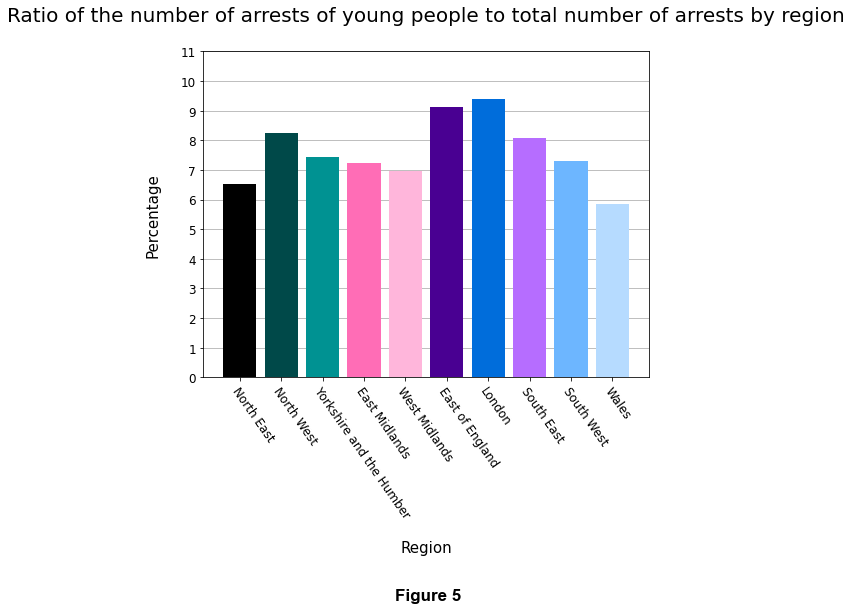

In [8]:
_=plt.figure(figsize=(8, 6))
colors = ["#000000","#004949","#009292","#ff6db6","#ffb6db", "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff"]

_=plt.bar(arrests['Region'], 100 * arrests['Total']/arrests['Total in region'], zorder=2, color=colors)

_=plt.xticks(rotation=305, fontsize=12, rotation_mode='anchor', ha='left')
_=plt.yticks(range(0, 12), fontsize=12)
_=plt.grid(axis='y', which='major', zorder=0)
_=plt.title('Ratio of the number of arrests of young people to total number of arrests by region', fontsize = 20, pad=30)
_=plt.xlabel('Region', fontsize=15, labelpad=20)
_=plt.ylabel('Percentage', fontsize=15, labelpad=20, rotation=90)
_=plt.text(3.75, -7.5, 'Figure 5', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

Figure 6 summarises the total number of young people arrests by ethnicity. It also includes the toal number of arrests by region and the respective populations.

In [9]:
arrests.style.set_caption("Figure 6")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; text-align: center; font-size: 17px; font-weight: bold; color: black; padding-top: 20px;\
     font-family: Arial'
 }], overwrite=False)

,Region,White,Black,Asian or Other,Mixed,Ethnic minorities,Unknown,Total,Total in region,10-17 population,10+ population
0,North East,2473,21,57,32,110,23,2606,40029,239483,2386608
1,North West,4033,284,245,194,723,937,5693,69090,691509,6487384
2,Yorkshire and the Humber,4487,224,422,305,951,967,6405,86333,521605,4873592
3,East Midlands,2288,333,178,201,712,173,3173,43863,448876,4306564
4,West Midlands,1647,391,426,265,1082,716,3445,49497,576856,5232455
5,East of England,2536,360,229,278,867,1434,4837,52943,596032,5508821
6,London,3510,4176,1555,1188,6919,327,10756,114602,845463,7800356
7,South East,5155,612,370,578,1560,1426,8141,100987,892087,8126742
8,South West,2402,187,90,211,488,226,3116,42701,502472,5048711
9,Wales,2150,82,87,62,231,231,2612,44656,280613,2803553


Unsurprisingly, figure 7 shows that white young people are arrested the most, explained by white people being the overwhelming majority in population. London is a regional exception, in that ethnic minorities make up the highest count of arrests. A good line of enquiry would be to determine why there is such a large discrepency between the London count and other regional counts.

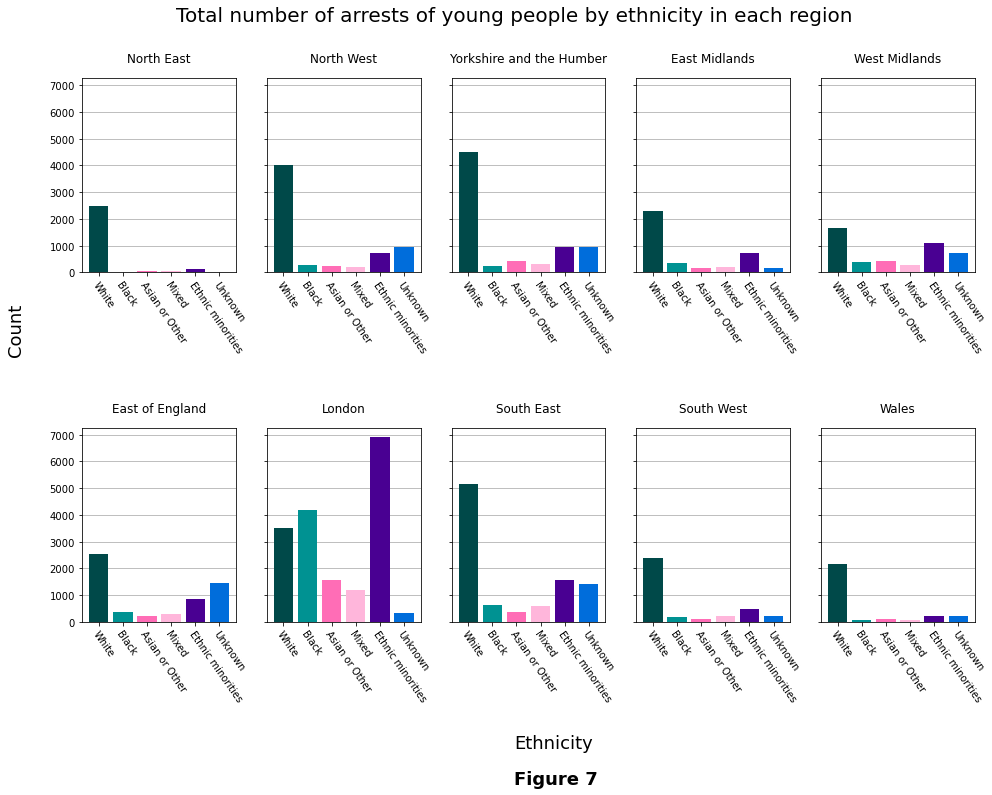

In [10]:
fig, ax = plt.subplots(2, 5, sharey = True, figsize = (16, 10))
ax_list = [ax[i, j] for i in range(2) for j in range(5)]

for m in ax_list:
    for n in range(10):
        if ax_list.index(m)==n:
            m.bar(arrests.columns.values[1:7], arrests.iloc[n, 1:7], label=arrests.iloc[n, 0],\
                  color=["#004949","#009292","#ff6db6","#ffb6db","#490092","#006ddb"], zorder=3)
            plt.setp(m.get_xticklabels(), rotation=305, rotation_mode='anchor', ha='left')
            m.set_title(arrests.iloc[n, 0], y=1.05)
            m.grid(which='major', axis='y', zorder=0)
            
_=plt.subplots_adjust(hspace = 0.8)
_=fig.suptitle('Total number of arrests of young people by ethnicity in each region', fontsize=20)
_=fig.text(x=0.06, y=0.5, s='Count', fontdict=dict(fontsize=18, rotation=90))
_=fig.text(x=0.5, y=-0.05, s='Ethnicity', fontdict=dict(fontsize=18))
_=fig.text(x=0.5, y=-0.1, s='Figure 7', fontdict=dict(fontsize=18, fontweight='bold'))

## Gross Disposable Household Income (GDHI)

A strong intuition that many people have is the idea that arrests rates, and crime in general, is highly correlated to wealth disparity. The greater the wealthy disparity in a given population, the higher the crime rate. We will determine if the data supports this conclusion.

In this analysis, we will use the IQR of GDHI per head to represent wealth disparity. By no means is this the best metric to use. Most assuredly there are better metrics available that are more scientific and representative of each region. Due to the limitation of data, however, the IQR of GDHI per head seems to be the best choice. The IQR is used in prefernce over the range because the IQR is more resilient to outliers and focuses on the core of the data. 

Figure 8 shows a summary of the data.

In [11]:
GDHI = pd.read_excel('Regional GDHI summary.xlsx', sheet_name = 0)
GDHI_per_head = pd.read_excel('Regional GDHI summary.xlsx', sheet_name = 1)
aprop = arrests['Total']/arrests['Total in region']
iqr = GDHI_per_head['GDHI per head 75th percentile']-GDHI_per_head['GDHI per head 25th percentile']
rnge = GDHI_per_head['Regional GDHI per head maximum']-GDHI_per_head['Regional GDHI per head minimum']
proportion_of_arrests_vs_GDHI_iqr = pd.DataFrame({'Region': arrests['Region'], 'Proportion of youth arrests by region':\
                                                  aprop, 'GDHI per head IQR': iqr, 'Range': rnge})
proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'] =\
    round(proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'], 3)

proportion_of_arrests_vs_GDHI_iqr.style.set_caption("Figure 8")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; text-align: center; font-size: 17px; font-weight: bold; color: black; padding-top: 20px;\
     font-family: Arial'
 }], overwrite=False)

,Region,Proportion of youth arrests by region,GDHI per head IQR,Range
0,North East,0.065000,1424,4381
1,North West,0.082000,3186,11002
2,Yorkshire and the Humber,0.074000,4032,11960
3,East Midlands,0.072000,2321,12254
4,West Midlands,0.070000,4496,13526
5,East of England,0.091000,4564,17526
6,London,0.094000,7931,181975
7,South East,0.081000,6883,23894
8,South West,0.073000,2754,12007
9,Wales,0.058000,1651,6762


In [12]:
city_GDHI = pd.read_excel('GDHI per head.xlsx')
city_GDHI.loc[city_GDHI['Region']=='Yorkshire and The Humber', 'Region'] = 'Yorkshire and the Humber'
city_GDHI_vs_proportion_of_arrests = city_GDHI.merge(proportion_of_arrests_vs_GDHI_iqr.iloc[:,0:2], on = 'Region')

A quick look at the distribution of GDHI per head of subregions shows the presence of outliers. Subregions are divsions of a region. This is shown in figure 9.

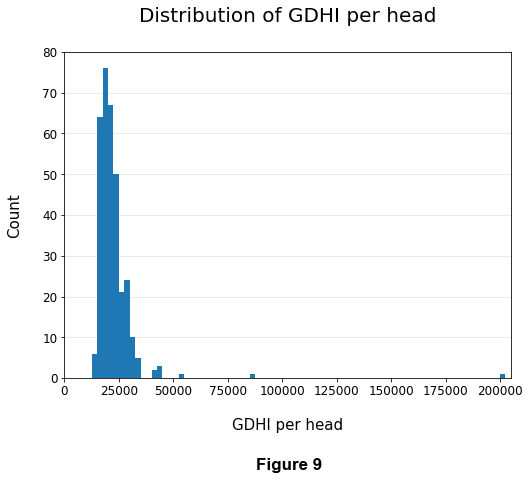

In [13]:
_=plt.figure(figsize=(8, 6))

_=plt.hist(city_GDHI_vs_proportion_of_arrests['GDHI per head'], bins=range(0, 203000, 2500), zorder=3)

_=plt.xticks([i for i in range(0, 206000, 25000)], fontsize=12)
_=plt.yticks(range(0, 85, 10), fontsize=12)
_=plt.xlabel('GDHI per head', fontsize=15, labelpad=20)
_=plt.ylabel('Count', fontsize=15, labelpad=20)
_=plt.title('Distribution of GDHI per head', fontsize=20, pad=30)
_=plt.grid(axis='y', which='major', zorder=0, alpha=0.3)
_=plt.xlim(0, 205000)
_=plt.text(88000, -22.5, 'Figure 9', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

Figure 10 shows us the culprit for these outliers. London seems to have subregions where GDHI per head is unusually high. This is to be expected.

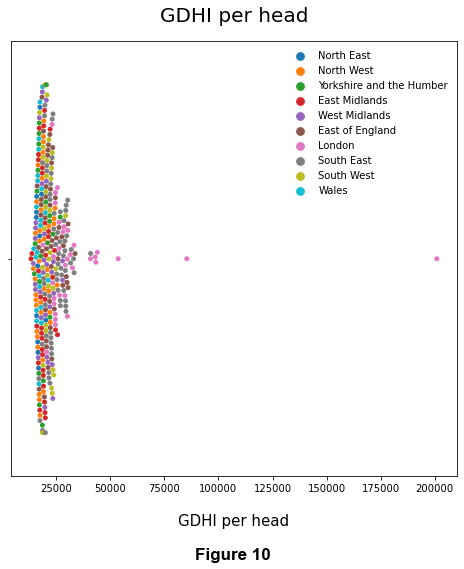

In [14]:
_=plt.figure(figsize=(8, 8))

_=sns.swarmplot(x='GDHI per head', y=['']*len(city_GDHI_vs_proportion_of_arrests), data=city_GDHI_vs_proportion_of_arrests, hue= 'Region', size=5)

_=plt.xlabel('GDHI per head', fontsize=15, labelpad=20)
_=plt.title('GDHI per head', fontsize=20, pad=20)
_=plt.legend(framealpha=0)
_=plt.text(89000, 0.69, 'Figure 10', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

After removing outliers we see a distribution that resembles a right-skewed gaussian distribution. Figure 11 shows us the data modelled by a right-skewed gaussian distribution. Fewer subregions have high GDHI per head in comparison to modest or low GDHI per head.

In [15]:
from scipy.stats import skewnorm

GDHI_38k_sorted = city_GDHI_vs_proportion_of_arrests.loc[city_GDHI_vs_proportion_of_arrests['GDHI per head']<38000, 'GDHI per head'].sort_values()

GDHI_norm = skewnorm.fit(GDHI_38k_sorted)
GDHI_model_pdf = skewnorm.pdf(x=GDHI_38k_sorted, a=GDHI_norm[0], loc=GDHI_norm[1], scale=GDHI_norm[2])
GDHI_model_cdf = skewnorm.cdf(x=GDHI_38k_sorted, a=GDHI_norm[0], loc=GDHI_norm[1], scale=GDHI_norm[2])

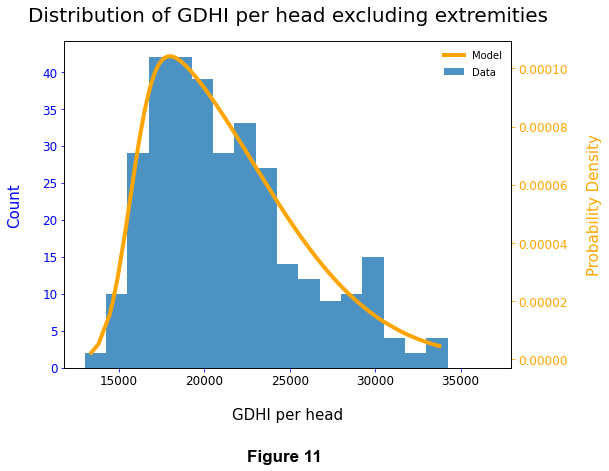

In [16]:
import decimal
fig2, ax2=plt.subplots(figsize=(8, 6))

_=ax2.hist(GDHI_38k_sorted, bins=range(13000, 38000, 1250), alpha=0.8, label='Data', zorder=3)

ax3 = ax2.twinx()

_=ax3.plot(GDHI_38k_sorted, GDHI_model_pdf, marker=None, lw=4, label='Model', color='orange', zorder=3)

_=ax2.set_xlabel('GDHI per head', fontsize=15, labelpad=20)
_=ax2.set_xticks(range(15000, 40000, 5000))
_=ax2.set_xticklabels(range(15000, 40000, 5000), fontsize=12)
_=plt.title('Distribution of GDHI per head excluding extremities', fontsize=20, pad=20)
_=ax2.legend(bbox_to_anchor=(0.987, 0.95), framealpha=0)
_=ax3.legend(framealpha=0)

_=ax2.set_ylabel('Count', fontsize=15, color= 'blue', labelpad=20)
_=ax2.tick_params(color='blue')
_=ax2.set_yticks(range(0, 45, 5))
_=ax2.set_yticklabels(range(0, 45, 5), color='blue', fontsize=12)

ax3_yticks = np.arange(0, 0.00012, 0.00002)

_=ax3.set_ylabel('Probability Density', fontsize=15, color= 'orange', labelpad=20)
_=ax3.tick_params(color='orange')
_=ax3.set_yticks([round(decimal.Decimal(i), 5) for i in ax3_yticks])
_=ax3.set_yticklabels([round(decimal.Decimal(i), 5) for i in ax3_yticks], color='orange', fontsize=12)
_=ax3.text(22500, -0.000035, 'Figure 11', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

The model is a good fit as shown in Figure 12, with an r-squared value of 0.999.

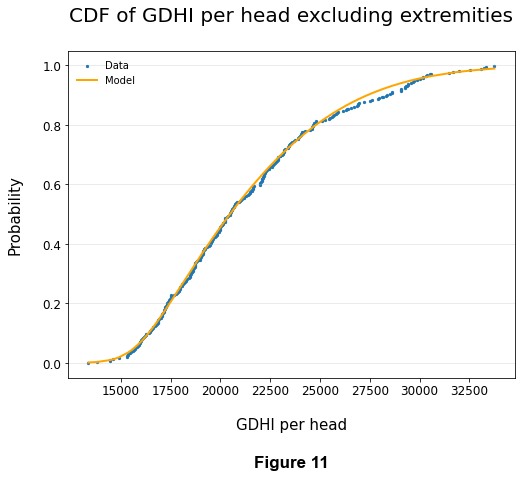

In [17]:
_=plt.figure(figsize=(8, 6))

prob = np.arange(len(GDHI_38k_sorted+1))/len(GDHI_38k_sorted)

_=plt.scatter(GDHI_38k_sorted, prob, label='Data', s=5)

_=plt.plot(GDHI_38k_sorted, GDHI_model_cdf, marker=None, lw=2, color='orange', label='Model')

_=plt.xlabel('GDHI per head', fontsize=15, labelpad=20)
_=plt.ylabel('Probability', fontsize=15, labelpad=20)
_=plt.yticks(np.arange(0, 1.1, 0.2), fontsize=12)
_=plt.xticks(range(15000, 33000, 2500), fontsize=12)
_=plt.title('CDF of GDHI per head excluding extremities', fontsize=20, pad=30)
_=plt.grid(axis='y', which='major', alpha=0.3)
_=plt.legend(framealpha=0)
_=plt.text(21700, -0.35, 'Figure 11', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

Figure 12 is a boxplot for GDHI per head by region, representing the metric we will use to represent wealth disparity. 

In [18]:
GDHI_mod_rss = np.sum((prob - GDHI_model_cdf)**2)
GDHI_mod_tss = np.sum((prob - np.mean(prob))**2)
GDHI_r_sqrd = 1 - GDHI_mod_rss/GDHI_mod_tss
print('R-squared: ' + str(GDHI_r_sqrd))

R-squared: 0.9989106031638275


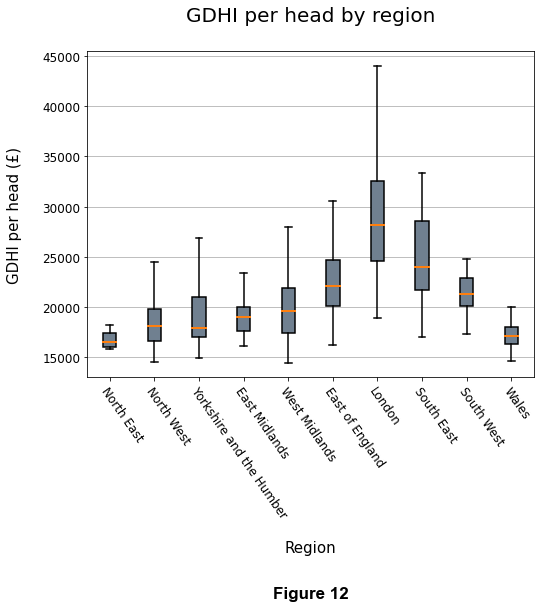

In [19]:
_=plt.figure(figsize=(8, 6))

for i in city_GDHI_vs_proportion_of_arrests['Region'].unique():
    _=plt.boxplot(city_GDHI_vs_proportion_of_arrests.loc[city_GDHI_vs_proportion_of_arrests['Region'] == i, 'GDHI per head'],\
                  positions = [city_GDHI_vs_proportion_of_arrests['Region'].unique().tolist().index(i)], widths = 0.3, showfliers= False,\
                  boxprops=dict(linewidth=1.5, facecolor='#708090'), medianprops=dict(linewidth=2),\
                  whiskerprops=dict(linewidth=1.5), patch_artist=True, capprops=dict(linewidth=1.5), zorder=2)
    

_=plt.xticks(range(10), city_GDHI_vs_proportion_of_arrests['Region'].unique(), rotation=305, rotation_mode='anchor', ha='left', fontsize=12)
_=plt.yticks(range(15000, 47500, 5000), fontsize=12)
_=plt.grid(axis='y', which='major', zorder=0)
_=plt.title('GDHI per head by region', fontsize=20, pad=30)
_=plt.xlabel('Region', fontsize=15, labelpad=20)
_=plt.ylabel('GDHI per head (£)', fontsize=15, labelpad=20)
_=plt.text(3.65, -9000, 'Figure 12', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

Figure 13 shows the proportion of arrests by region versus the IQR of GDHI per head. A linear regression model has been fitted to the date and there is a relatively strong positive correlation between the two. That is, the greater the wealth disparity of a region, the greater the number of arrests.

It is important to keep in mind that the dataset is incredibly small and so the conclusions drawn from this analysis should only motivate further enquiry to ascertain the findings of this analysis or correct it where it has erred.

In [20]:
total_arrests = arrests['Total in region'].sum()
proportion_of_arrests_vs_GDHI_iqr['Proportion of arrests by region'] = arrests['Total in region']/total_arrests

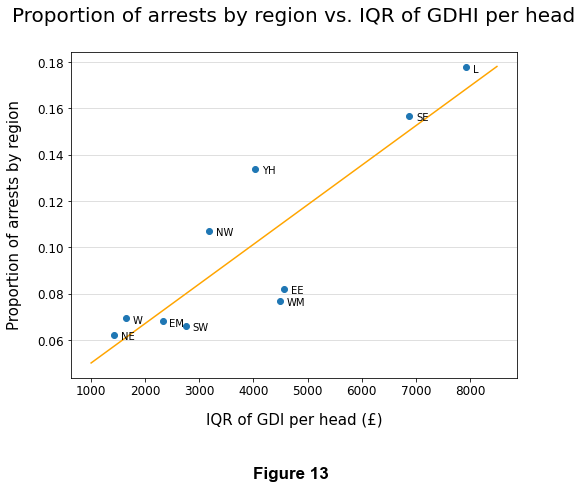

In [21]:
_=plt.figure(figsize=(8, 6))

_=plt.scatter(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr['Proportion of arrests by region'])

region_ac = ['NE', 'NW', 'YH', 'EM', 'WM', 'EE', 'L', 'SE', 'SW', 'W']
region_dict = pd.Series(region_ac, index=arrests['Region'].values).to_dict()

linreg3 = linregress(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr['Proportion of arrests by region'])

x = np.linspace(1000, 8500, 100)
y3 = linreg3.slope * x + linreg3.intercept

_=plt.plot(x, y3, marker='', linestyle='-', color='orange')

for i in region_dict:
    plt.annotate(text=region_dict[i], xy = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of arrests by region']),\
                     xytext = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'] + 125, proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of arrests by region'] - 0.002))

_=plt.xticks(range(1000, 8500, 1000), fontsize=12)
_=plt.yticks(fontsize=12)
_=plt.grid(axis='y', which='major', alpha=0.5)
_=plt.title('Proportion of arrests by region vs. IQR of GDHI per head', fontsize=20, pad=30)
_=plt.xlabel('IQR of GDI per head (£)', fontsize=15, labelpad=15)
_=plt.ylabel('Proportion of arrests by region', fontsize=15, labelpad=15)
_=plt.text(4000, 0, 'Figure 13', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

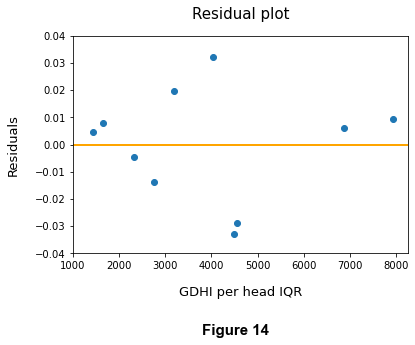

In [22]:
y_pred3 = linreg3.slope * proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'] + linreg3.intercept
res3 = proportion_of_arrests_vs_GDHI_iqr['Proportion of arrests by region'] - y_pred3
_=plt.scatter(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], res3)

_=plt.axhline(y=0, linewidth=2, color='orange')
_=plt.yticks(np.arange(-0.04, 0.041, 0.01))
_=plt.xticks(range(1000, 9000, 1000))
_=plt.xlabel('GDHI per head IQR', fontsize=13, labelpad=15)
_=plt.ylabel('Residuals', fontsize=13, labelpad=15)
_=plt.title('Residual plot', fontsize=15, y=1.05)
_=plt.text(3800, -0.07, 'Figure 14', fontsize= 15, fontweight= 'bold', fontfamily= 'Arial')

A large r-squared value and small RMSE value indicates that the two variables are strongly correlated. The p-value is significantly less than the threshold 0.05 and so our model is apt. Here the null hypothesis is that the slope of the linear regression is 0. 

In [23]:
r_sqrd3 = linreg3.rvalue**2
print('R-squared: ' + str(r_sqrd3))

R-squared: 0.7628243387729756


In [24]:
rmse3 = np.sqrt(np.sum(res3**2)/res3.size)
print('RMSE: ' + str(rmse3))

RMSE: 0.01939421380883672


In [25]:
print('p-value: ' + str(linreg3.pvalue))

p-value: 0.0009620219619323019


A similar story is shown in Figure 15 when looking at the proportion of arrests of ethnic minority by region versus the IQR of GDHI per head. The greater the wealth disparity, the greater the arrest rates of people of ethnic minority.

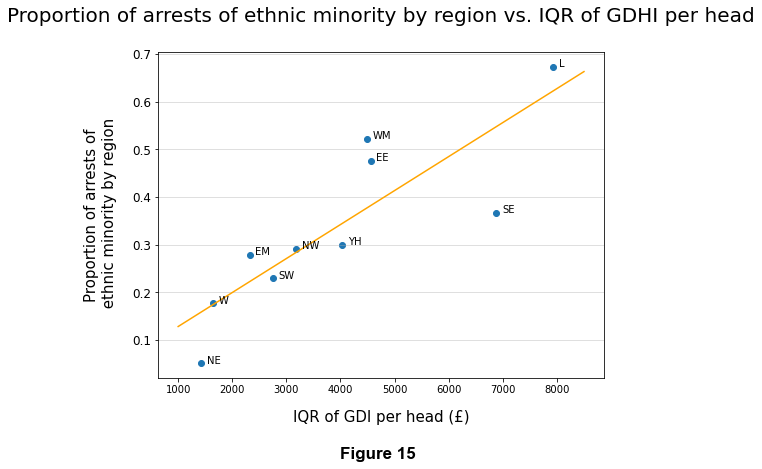

In [26]:
_=plt.figure(figsize=(8, 6))

eth_props = (arrests['Total'] - arrests['White'])/arrests['Total']

_=plt.scatter(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], eth_props)

linreg4 = linregress(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], eth_props)

y4 = linreg4.slope * x + linreg4.intercept

_=plt.plot(x, y4, color='orange')

for i in region_dict:
    plt.annotate(text=region_dict[i], xy = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'], eth_props[list(region_dict.keys()).index(i)]),\
                 xytext = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'] + 100, eth_props[list(region_dict.keys()).index(i)]))
    
_=plt.yticks(fontsize=12)
_=plt.grid(axis='y', which='major', alpha=0.5)
_=plt.title('Proportion of arrests of ethnic minority by region vs. IQR of GDHI per head', fontsize=20, pad=30)
_=plt.xlabel('IQR of GDI per head (£)', fontsize=15, labelpad=15)
_=plt.ylabel('Proportion of arrests of\n ethnic minority by region', fontsize=15, labelpad=15)
_=plt.text(4000, -0.15, 'Figure 15', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

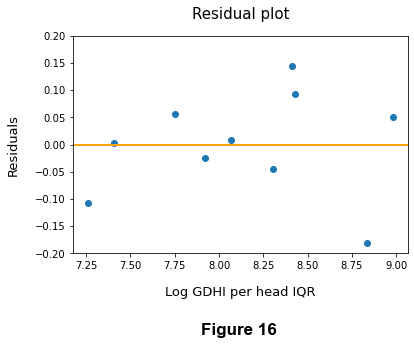

In [27]:
y4_pred = linreg4.slope * proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'] + linreg4.intercept
res4 = eth_props - y4_pred
_=plt.scatter(np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR']), res4)

_=plt.axhline(y=0, linewidth=2, color='orange')
_=plt.yticks(np.arange(-0.2, 0.21, 0.05))
_=plt.xlabel('Log GDHI per head IQR', fontsize=13, labelpad=15)
_=plt.ylabel('Residuals', fontsize=13, labelpad=15)
_=plt.title('Residual plot', fontsize=15, y=1.05)
_=plt.text(7.9, -0.35, 'Figure 16', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

In [28]:
r_sqrd4 = linreg4.rvalue**2
print('R-squared: ' + str(r_sqrd4))

R-squared: 0.7195640964368242


In [29]:
rmse4 = np.sqrt(np.sum(res4**2)/res4.size)
print('RMSE: ' + str(rmse4))

RMSE: 0.09073305330073853


In [30]:
print('p-value: ' + str(linreg4.pvalue))

p-value: 0.0019226581319177485


The correlation is not as strong when comparing the proportion of arrests of young people versus the IQR of GDHI per head, as shown in Figure 17. Despite this, the correlation is still fairly strong. The greater the wealth disparity, the larger the number of arrests of young people.

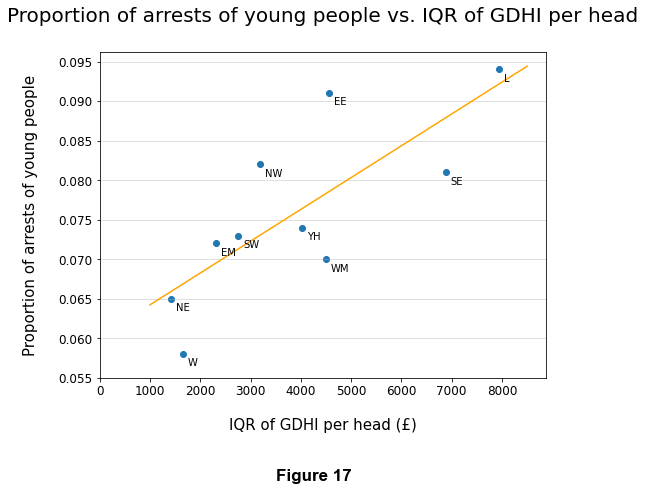

In [31]:
_=plt.figure(figsize=(8, 6))
_=plt.scatter(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'])

for i in region_dict:
    plt.annotate(text=region_dict[i], xy = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of youth arrests by region']),\
                     xytext = (proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR'] + 100, proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of youth arrests by region'] - 0.0015))

linreg = linregress(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'])
    
y = linreg.slope * x + linreg.intercept
_=plt.plot(x, y, marker='', linestyle='-', color='orange')

_=plt.xticks(range(0, 8500, 1000), fontsize=12)
_=plt.yticks(np.arange(0.055, 0.1, 0.005), fontsize=12)
_=plt.grid(axis='y', which='major', alpha=0.5)
_=plt.title('Proportion of arrests of young people vs. IQR of GDHI per head', fontsize=20, pad=30)
_=plt.xlabel('IQR of GDHI per head (£)', fontsize=15, labelpad=20)
_=plt.ylabel('Proportion of arrests of young people', fontsize=15, labelpad=20)
_=plt.text(3500, 0.042, 'Figure 17', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

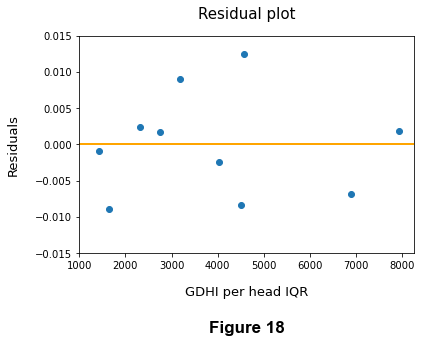

In [32]:
y_pred = linreg.slope * proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'] + linreg.intercept
res = proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'] - y_pred
_=plt.scatter(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'], res)

_=plt.axhline(y=0, linewidth=2, color='orange')
_=plt.yticks(np.arange(-0.015, 0.016, 0.005))
_=plt.xticks(range(1000, 9000, 1000))
_=plt.xlabel('GDHI per head IQR', fontsize=13, labelpad=15)
_=plt.ylabel('Residuals', fontsize=13, labelpad=15)
_=plt.title('Residual plot', fontsize=15, y=1.05)
_=plt.text(3800, -0.026, 'Figure 18', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

In [33]:
r_sqrd = linreg.rvalue**2
print('R-squared: ' + str(r_sqrd))

R-squared: 0.5990282405802662


In [34]:
rmse = np.sqrt(np.sum(res**2)/res.size)
print('RMSE: ' + str(rmse))

RMSE: 0.006701405602932132


In [35]:
print('p-value: ' + str(linreg.pvalue))

p-value: 0.008604437185652684


Taking the log of the IQR of GDHI per head gives us a better result, as shown in Figure 19.

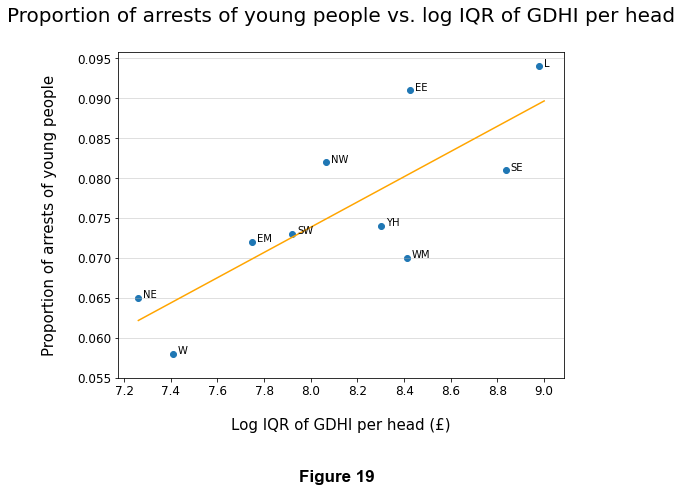

In [36]:
_=plt.figure(figsize=(8, 6))
_=plt.scatter(np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR']), proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'])

for i in region_dict:
    plt.annotate(text=region_dict[i], xy = (np.log(proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR']), proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of youth arrests by region']),\
                     xytext = (np.log(proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'GDHI per head IQR']) + 0.02, proportion_of_arrests_vs_GDHI_iqr.loc[proportion_of_arrests_vs_GDHI_iqr['Region']==i, 'Proportion of youth arrests by region']))

linreg_log = linregress(np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR']), proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'])
    
x_log = np.linspace(np.min(np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR'])), 9, 100)
y_log = linreg_log.slope * x_log + linreg_log.intercept
_=plt.plot(x_log, y_log, marker='', linestyle='-', color='orange')

_=plt.xticks(np.arange(7.2, 9.2, 0.2), fontsize=12)
_=plt.yticks(np.arange(0.055, 0.1, 0.005), fontsize=12)
_=plt.grid(axis='y', which='major', alpha=0.5)
_=plt.title('Proportion of arrests of young people vs. log IQR of GDHI per head', fontsize=20, pad=30)
_=plt.xlabel('Log IQR of GDHI per head (£)', fontsize=15, labelpad=20)
_=plt.ylabel('Proportion of arrests of young people', fontsize=15, labelpad=20)

_=plt.text(7.95, 0.042, 'Figure 19', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

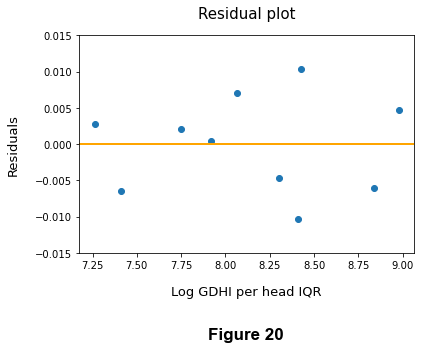

In [37]:
log_y_pred = linreg_log.slope * np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR']) + linreg_log.intercept
log_res = proportion_of_arrests_vs_GDHI_iqr['Proportion of youth arrests by region'] - log_y_pred
_=plt.scatter(np.log(proportion_of_arrests_vs_GDHI_iqr['GDHI per head IQR']), log_res)

_=plt.axhline(y=0, linewidth=2, color='orange')
_=plt.yticks(np.arange(-0.015, 0.016, 0.005))
_=plt.xlabel('Log GDHI per head IQR', fontsize=13, labelpad=15)
_=plt.ylabel('Residuals', fontsize=13, labelpad=15)
_=plt.title('Residual plot', fontsize=15, y=1.05)
_=plt.text(7.9, -0.027, 'Figure 20', fontsize= 17, fontweight= 'bold', fontfamily= 'Arial')

In [38]:
log_r_sqrd = linreg_log.rvalue**2
print('R-squared: ' + str(log_r_sqrd))

R-squared: 0.6418293219399506


In [39]:
log_rmse = np.sqrt(np.sum(log_res**2)/log_res.size)
print('RMSE: ' + str(log_rmse))

RMSE: 0.006333649496358754


In [40]:
print('p-value: ' + str(linreg_log.pvalue))

p-value: 0.005340280953836204


In conclusion, there seems to be a strong correlation between wealth disparity and arrest rates. The greater the wealth disparity in a given population, the greater the arrest rates. This is also true for arrest rates of people of ethnicy minority and arrest rates of young people, although this is not surprising. 

As mentioned before, to truly ascertain the correlations above, a much larger dataset is required and a better metric that represents wealth disparity.